### importer les packages necessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
import streamlit as st

### collecte de données

In [2]:
df = pd.read_csv('iris.csv',sep=",")
data = df.copy()

In [3]:
data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data = data.drop(columns='Unnamed: 0')
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Analyse exploratoire

## Analyse univariée

In [7]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
data['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [9]:
data['Species'].value_counts(normalize=True)*100

Species
setosa        33.333333
versicolor    33.333333
virginica     33.333333
Name: proportion, dtype: float64

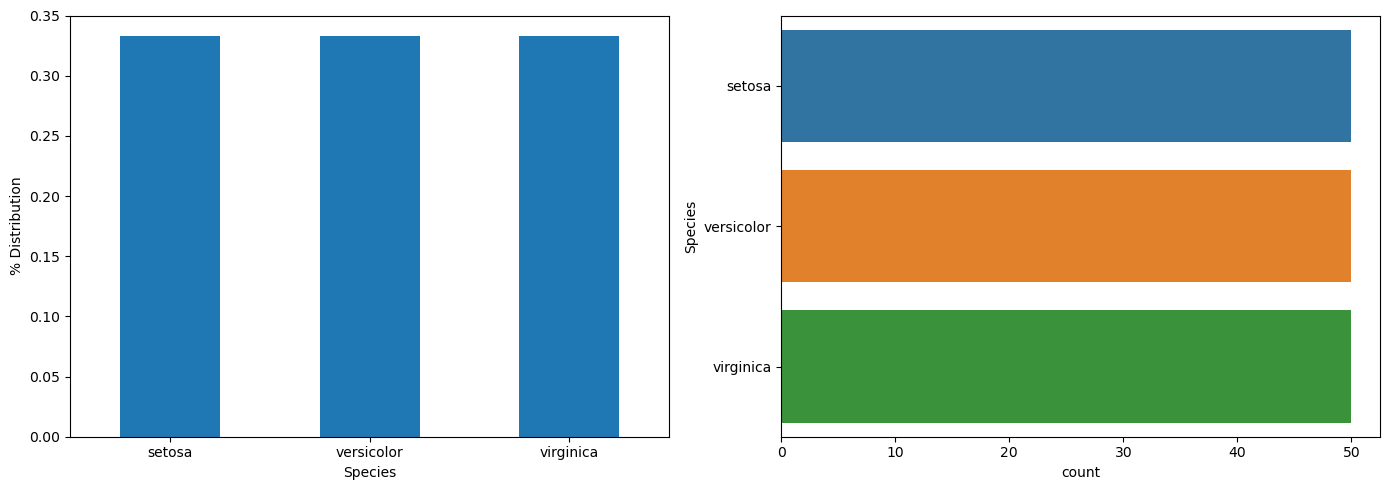

In [10]:
# distribution 

#sns.Plot(flights["month"], flights["passengers"]).add(sns.Bar())

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
data['Species'].value_counts(normalize=True).plot.bar(rot=0)
plt.xlabel('Species')
plt.ylabel('% Distribution')
plt.subplot(1,2,2)
sns.countplot(data=data,y='Species')
plt.tight_layout()
plt.show()

In [11]:
# Features ou caracteristiques 

feature = data.drop(columns='Species')
feature

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
feature.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')

C:\Users\Muhamad Yesufu\AppData\Local\Temp\ipykernel_22304\1659226801.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],shade=True)
C:\Users\Muhamad Yesufu\AppData\Local\Temp\ipykernel_22304\1659226801.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],shade=True)
C:\Users\Muhamad Yesufu\AppData\Local\Temp\ipykernel_22304\1659226801.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],shade=True)
C:\Users\Muhamad Yesufu\AppData\Local\Temp\ipykernel_22304\1659226801.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn

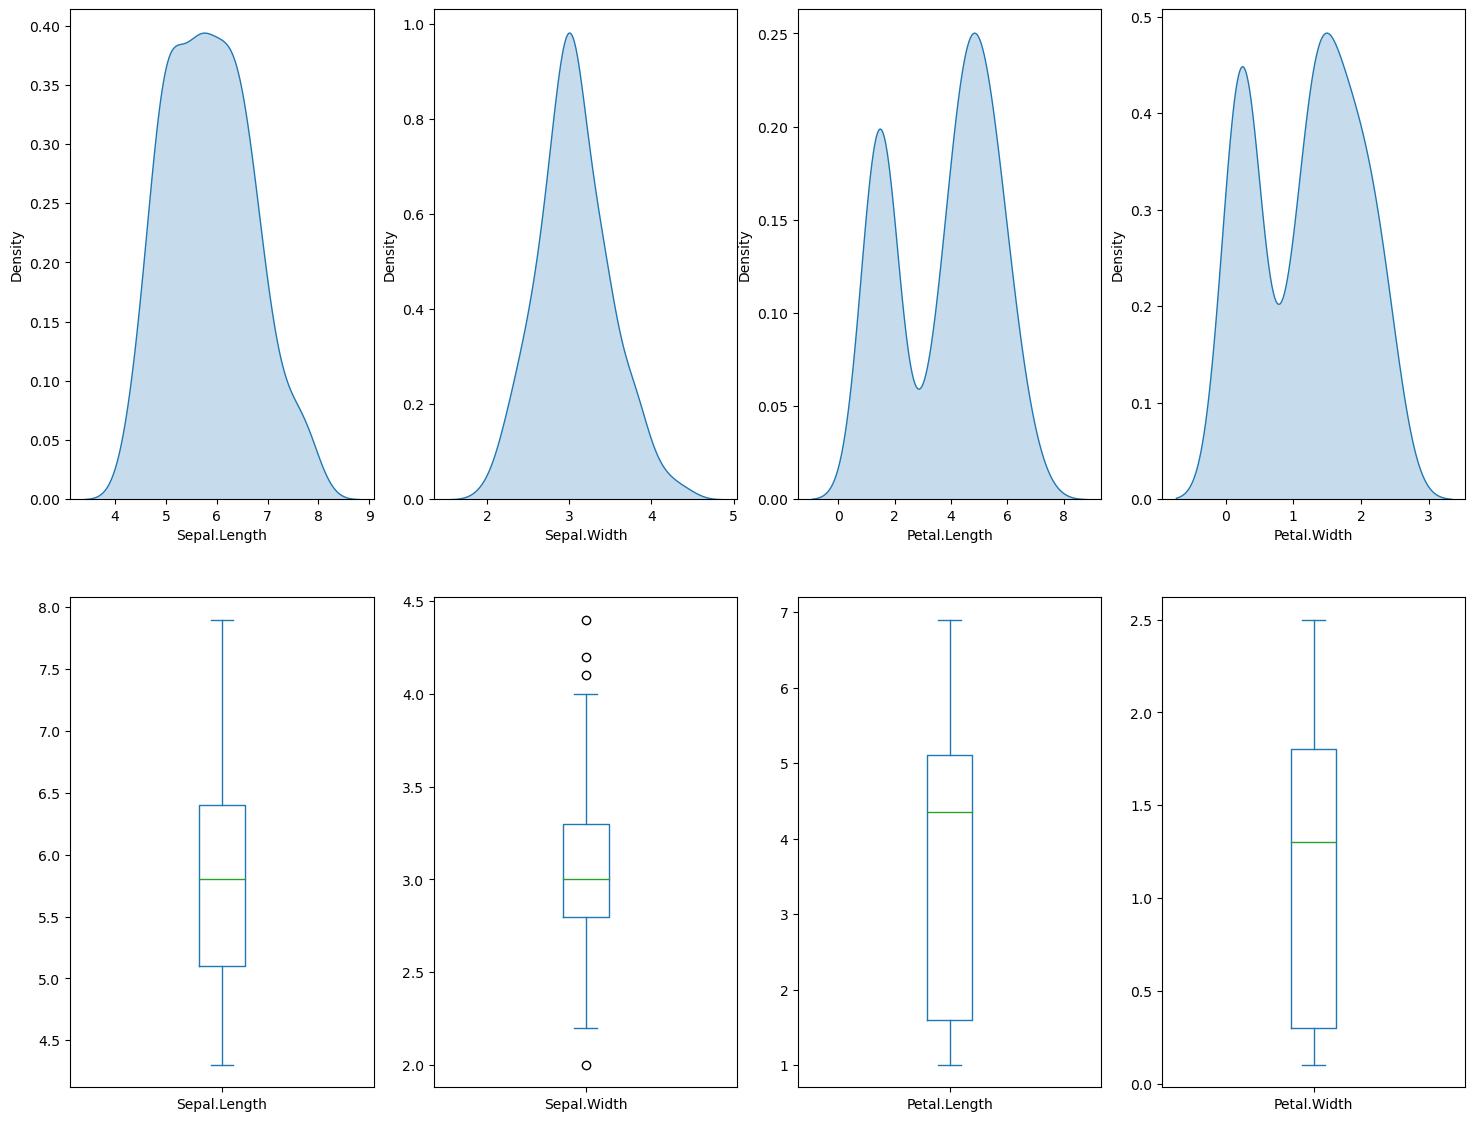

In [13]:
data_feature=feature.columns.tolist()
plt.figure(figsize=(18,14))
for i,col in enumerate(data_feature,1):
    plt.subplot(2,4,i)
    sns.kdeplot(data[col],shade=True)
    plt.subplot(2,4,i+4)
    data[col].plot.box()
plt.tight_layout
plt.show()

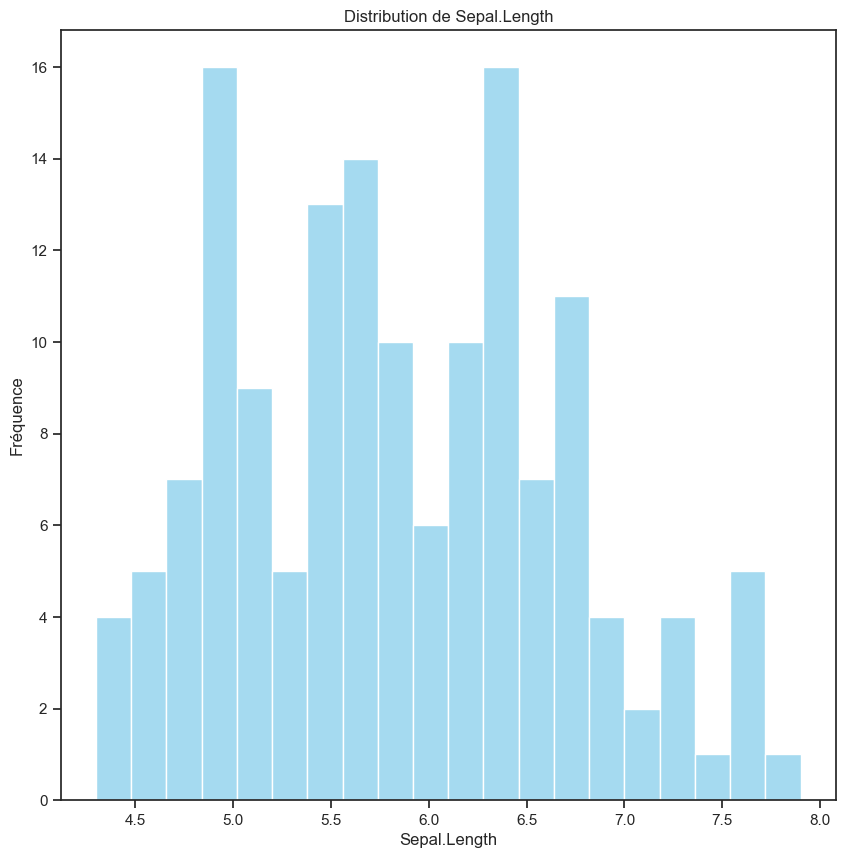

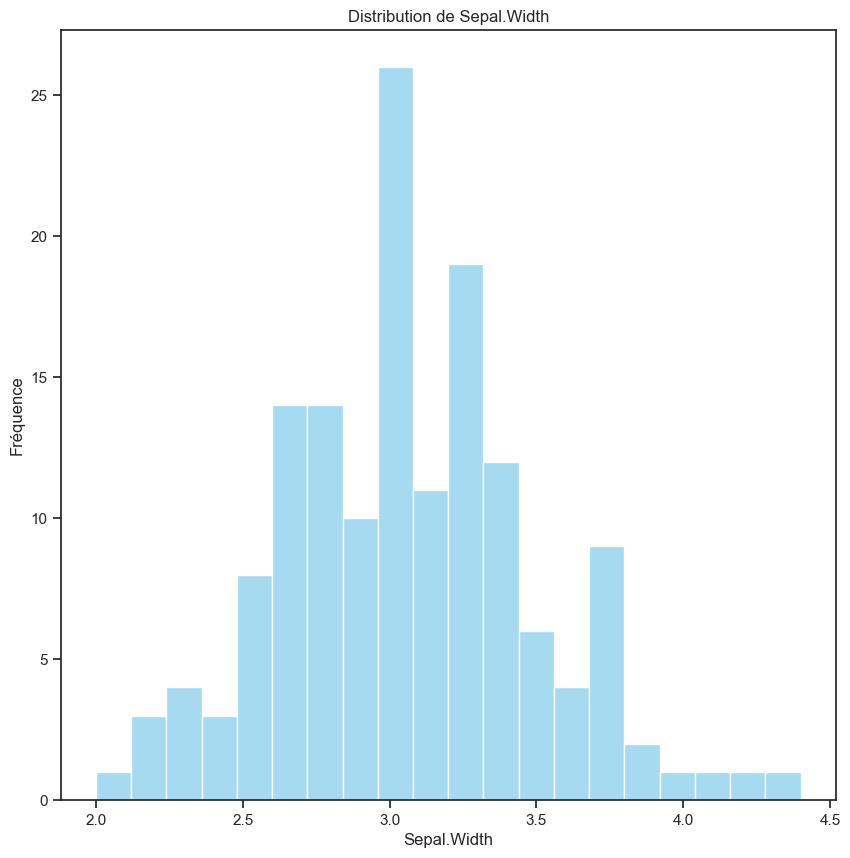

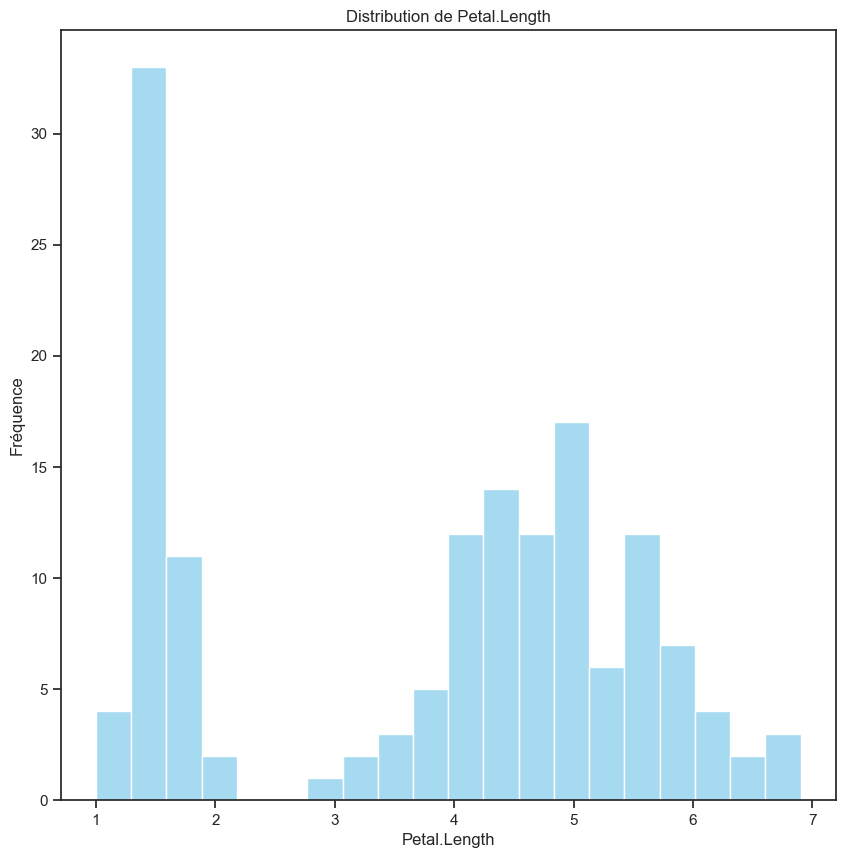

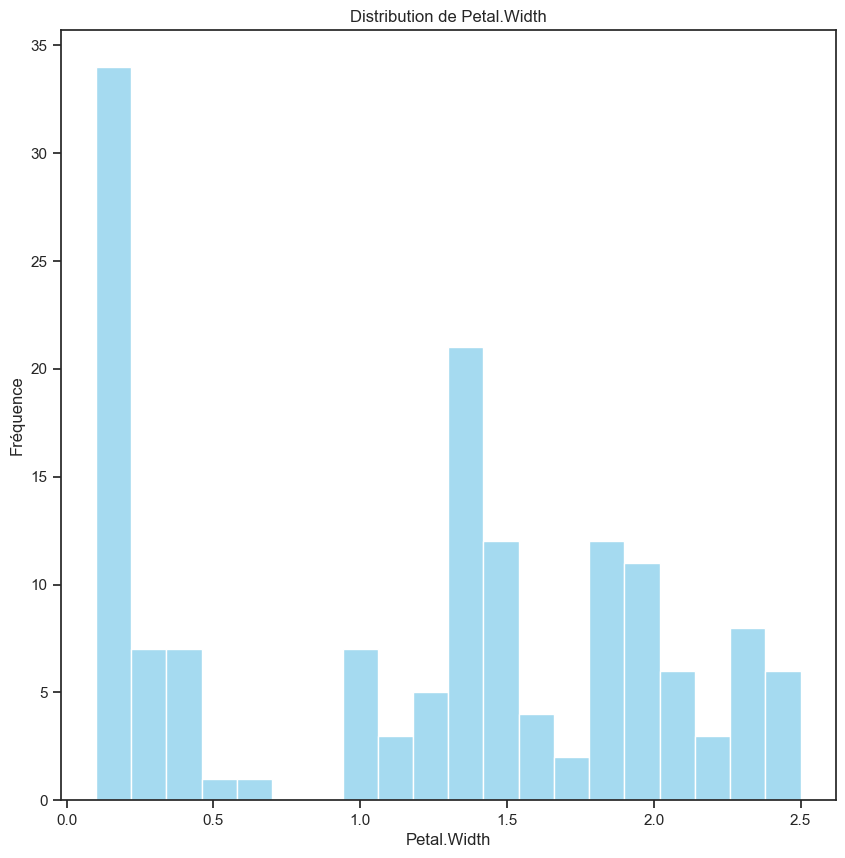

In [14]:
# Définir le style de Seaborn
sns.set(style="ticks")

# Parcours de chaque variable quantitative dans features
for var in feature.columns:
    if feature[var].dtype != 'object':  # Vérifier si la variable n'est pas de type 'object'
        plt.figure(figsize=(10, 10))
        sns.histplot(feature[var], kde=False, color='skyblue', bins=20)  # Tracé de l'histogramme
        plt.title(f'Distribution de {var}')
        plt.xlabel(var)
        plt.ylabel('Fréquence')
        plt.show()

In [15]:
skw = data[data_feature].skew()
krt = data[data_feature].kurtosis()
print(skw)
print(krt)

Sepal.Length    0.314911
Sepal.Width     0.318966
Petal.Length   -0.274884
Petal.Width    -0.102967
dtype: float64
Sepal.Length   -0.552064
Sepal.Width     0.228249
Petal.Length   -1.402103
Petal.Width    -1.340604
dtype: float64


In [16]:
pd.DataFrame(data=[skw, krt], index=['skew', 'kurtosis'])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
skew,0.314911,0.318966,-0.274884,-0.102967
kurtosis,-0.552064,0.228249,-1.402103,-1.340604


## Analyse multivariée

In [17]:
def recodage(d):
    for col in d.select_dtypes(include='object').columns:
        d[col] = d[col].astype('category').cat.codes
    return d

recodage(data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
data['Species'].unique()

array([0, 1, 2], dtype=int8)

<Axes: >

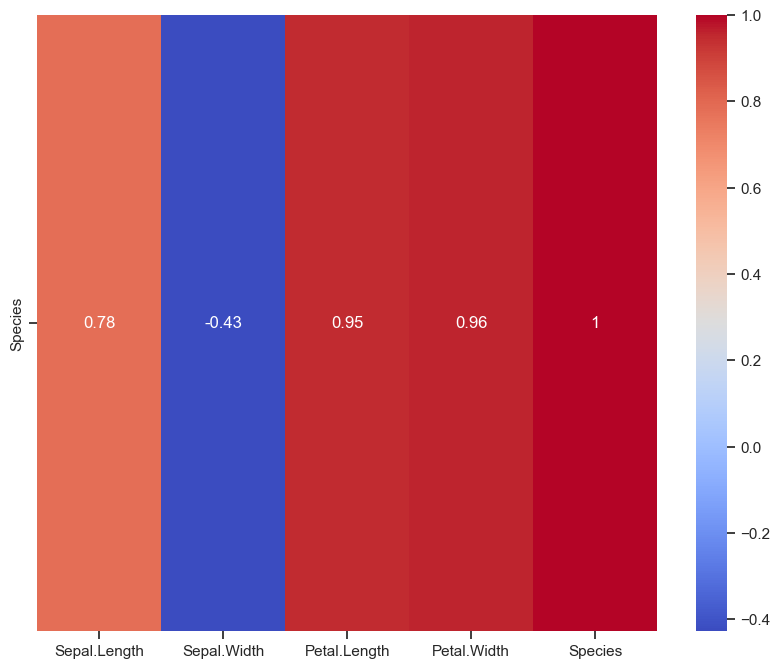

In [19]:
# Calcul de la matrice de corrélation
corr_matrix = data.corr()


plt.figure(figsize=(10, 8))
# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix.iloc[[-1]], annot=True, cmap="coolwarm")

<Axes: xlabel='Species', ylabel='Petal.Width'>

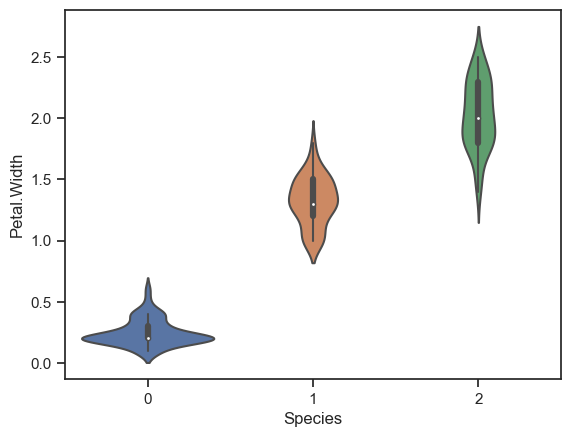

In [20]:
sns.violinplot(data=data, x='Species', y='Petal.Width')

### Machine learning

In [21]:
target = data['Species']

In [22]:
feature = data.drop('Species', axis=1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#Diviser le dataset pour le jeu d'apprentissage(training) et le test
X_train,X_test,y_train,y_test= train_test_split(feature, target, test_size= 0.2, random_state=42)

In [25]:
X_train.shape

(120, 4)

In [26]:
X_test.shape

(30, 4)

In [27]:
data.shape

(150, 5)

In [28]:
from sklearn.linear_model import LogisticRegression 

In [29]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.975

In [30]:
model.score(X_test, y_test)

1.0

In [31]:
model.predict_proba(X_test.iloc[:1])

array([[0.00378408, 0.82719281, 0.16902311]])

In [32]:
X_test.iloc[:1]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
73,6.1,2.8,4.7,1.2


In [33]:
y_test.iloc[:1]

73    1
Name: Species, dtype: int8

In [34]:
data['Species'].unique()


array([0, 1, 2], dtype=int8)

#  Interface streamlit

In [38]:
# Afficher les résultats
st.subheader("Évaluation du modèle")
# st.write("Précision du modèle :", accuracy_score(y_test, y_pred))
# st.write("Rapport de classification :\n", classification_report(y_test, y_pred))

# Afficher la prédiction pour une observation spécifique
st.sidebar.title("Prédiction pour une observation spécifique")
sepal_length = st.sidebar.slider("Longueur du sépale", float(data['Sepal.Length'].min()), float(data['Sepal.Length'].max()), float(data['Sepal.Length'].mean()))
sepal_width = st.sidebar.slider("Largeur du sépale", float(data['Sepal.Width'].min()), float(data['Sepal.Width'].max()), float(data['Sepal.Width'].mean()))
petal_length = st.sidebar.slider("Longueur du pétale", float(data['Petal.Length'].min()), float(data['Petal.Length'].max()), float(data['Petal.Length'].mean()))
petal_width = st.sidebar.slider("Largeur du pétale", float(data['Petal.Width'].min()), float(data['Petal.Width'].max()), float(data['Petal.Width'].mean()))

# Prédictions
prediction = model.predict([[sepal_length, sepal_width, petal_length, petal_width]])
prediction_proba = model.predict_proba([[sepal_length, sepal_width, petal_length, petal_width]])

st.sidebar.subheader("Prédiction")
st.sidebar.write("Espèce prédite :", prediction[0])
st.sidebar.write("Probabilité de chaque classe :", dict(zip(model.classes_, prediction_proba[0])))

C:\Users\Muhamad Yesufu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Muhamad Yesufu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
